# Explore the dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv(r'C:\Users\mohdr\Portfolio project\CSV\us_df_final_2015_2023.csv', index_col = 0)
df.set_index('date', inplace=True)
# df.info()  # Falls du Informationen über den DataFrame anzeigen möchtest
#df

# Step 1: Check for stationarity of time series
## Method #1: time series plot

In [161]:
df.columns

Index(['03668_FD_STRAHL', '03668_FG_STRAHL', '03668_SD_STRAHL',
       '05792_FD_STRAHL', '05792_FG_STRAHL', '05792_SD_STRAHL',
       '05856_FD_STRAHL', '05856_FG_STRAHL', '05856_SD_STRAHL',
       '05705_FD_STRAHL', '05705_FG_STRAHL', '05705_SD_STRAHL',
       '02290_FD_STRAHL', '02290_FG_STRAHL', '02290_SD_STRAHL',
       '05404_FD_STRAHL', '05404_FG_STRAHL', '05404_SD_STRAHL',
       'Bruttoleistung', 'Nettoleistung', 'Prog_in_MW', 'Act_in_MW',
       'Bruttoleistung_kumulativ', 'Nettoleistung_kumulativ',
       'first_difference', 'seasonal_first_difference'],
      dtype='object')

### By plotting all variables against date, we can visualize these patterns and get an initial assessment of whether seasonal components are present in the data

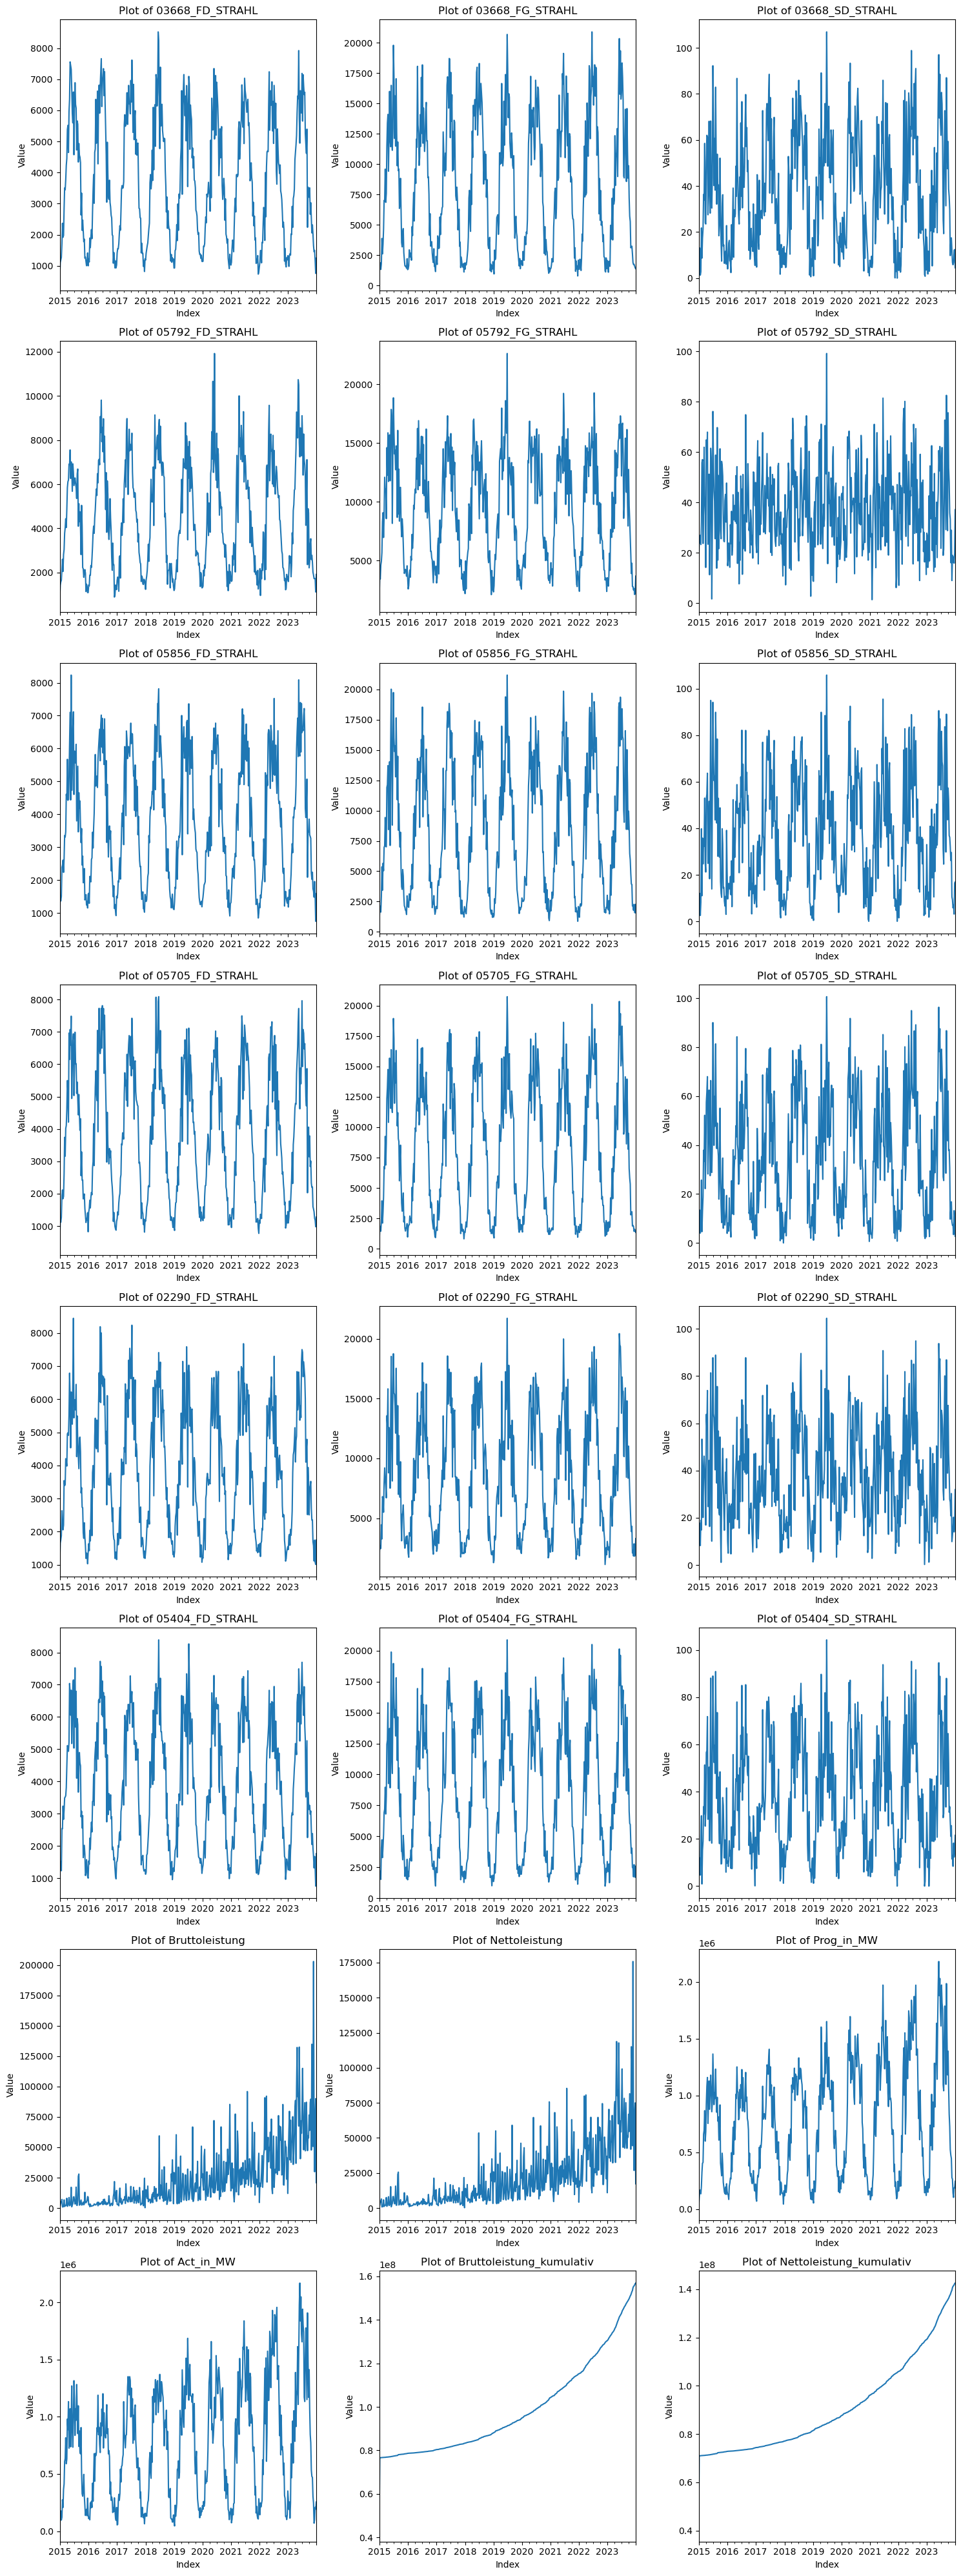

In [173]:
import matplotlib.pyplot as plt

# Liste der Spaltennamen außer 'Date'
column_names = ['03668_FD_STRAHL', '03668_FG_STRAHL', '03668_SD_STRAHL',
                '05792_FD_STRAHL', '05792_FG_STRAHL', '05792_SD_STRAHL',
                '05856_FD_STRAHL', '05856_FG_STRAHL', '05856_SD_STRAHL',
                '05705_FD_STRAHL', '05705_FG_STRAHL', '05705_SD_STRAHL',
                '02290_FD_STRAHL', '02290_FG_STRAHL', '02290_SD_STRAHL',
                '05404_FD_STRAHL', '05404_FG_STRAHL', '05404_SD_STRAHL',
                'Bruttoleistung', 'Nettoleistung', 'Prog_in_MW', 'Act_in_MW',
                'Bruttoleistung_kumulativ', 'Nettoleistung_kumulativ']

# Schleife über jede Spalte und Erstellung des Plots
num_columns = len(column_names)
num_plots_per_row = 3
num_rows = num_columns // num_plots_per_row + (num_columns % num_plots_per_row > 0)

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5 * num_rows))

for i, column in enumerate(column_names):
    row = i // num_plots_per_row
    col = i % num_plots_per_row
    ax = axes[row, col]
    df_weekly[column].plot(ax=ax)
    ax.set_title(f'Plot of {column}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()

## Decomposition

<Figure size 640x480 with 0 Axes>

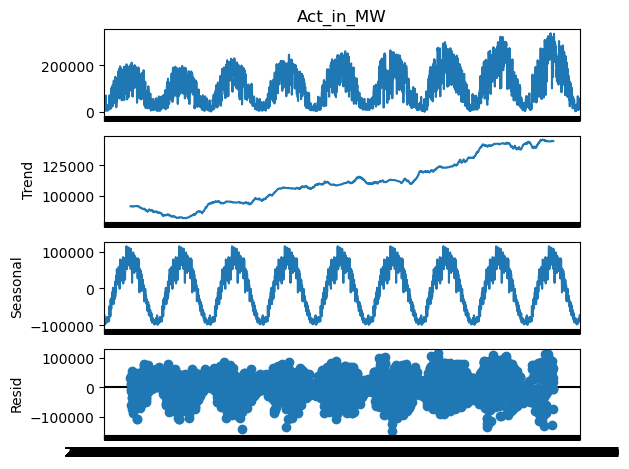

In [4]:
# Assuming 'Act_in_MW' is the column you want to decompose
# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Act_in_MW'], period=365)  

# Plot the decomposed components
fig = plt.figure()  
fig = decomposition.plot()  
plt.show()

In [5]:
trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid 

# Method #2: ADF Stationarity test 


In [44]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(window=52).mean()
    rolstd = timeseries.rolling(window=52).std()

    # Plot rolling statistics
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

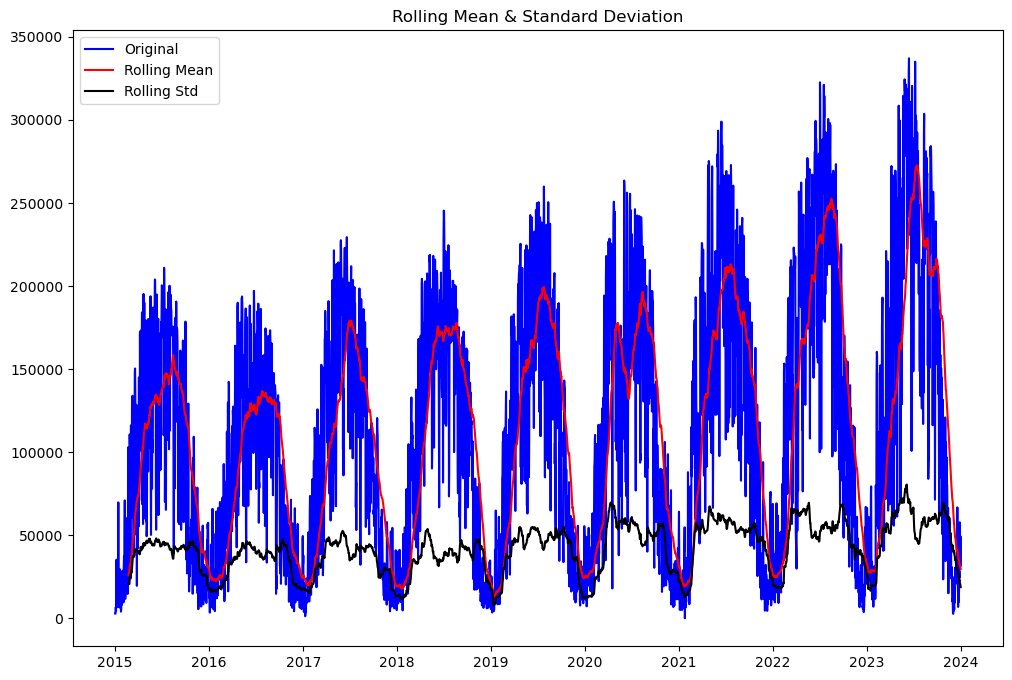

Results of Dickey-Fuller Test:
Test Statistic                   -3.457697
p-value                           0.009142
#Lags Used                       18.000000
Number of Observations Used    3268.000000
Critical Value (1%)              -3.432353
Critical Value (5%)              -2.862425
Critical Value (10%)             -2.567241
dtype: float64


In [45]:
# Beispielaufruf mit der Spalte 'Act_in_MW'
test_stationarity(df['Act_in_MW'])

# Transform to stationary: differencing

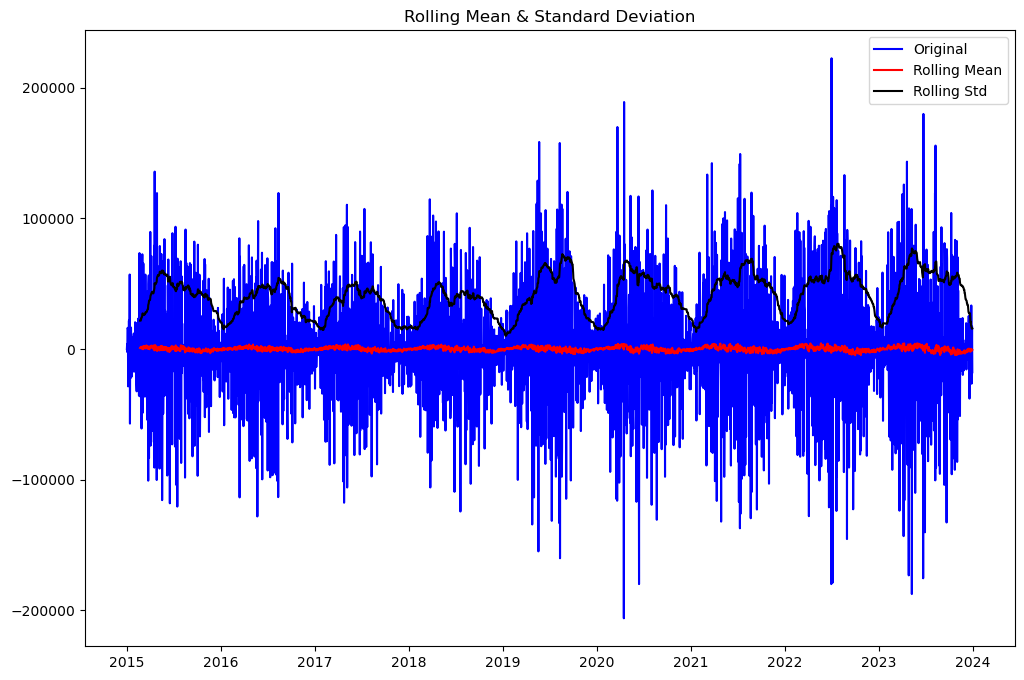

Results of Dickey-Fuller Test:
Test Statistic                -1.732763e+01
p-value                        5.434025e-30
#Lags Used                     2.200000e+01
Number of Observations Used    3.263000e+03
Critical Value (1%)           -3.432356e+00
Critical Value (5%)           -2.862426e+00
Critical Value (10%)          -2.567242e+00
dtype: float64


In [46]:
df['first_difference'] = df['Act_in_MW'] - df['Act_in_MW'].shift(1)
test_stationarity(df['first_difference'].dropna(inplace = False))

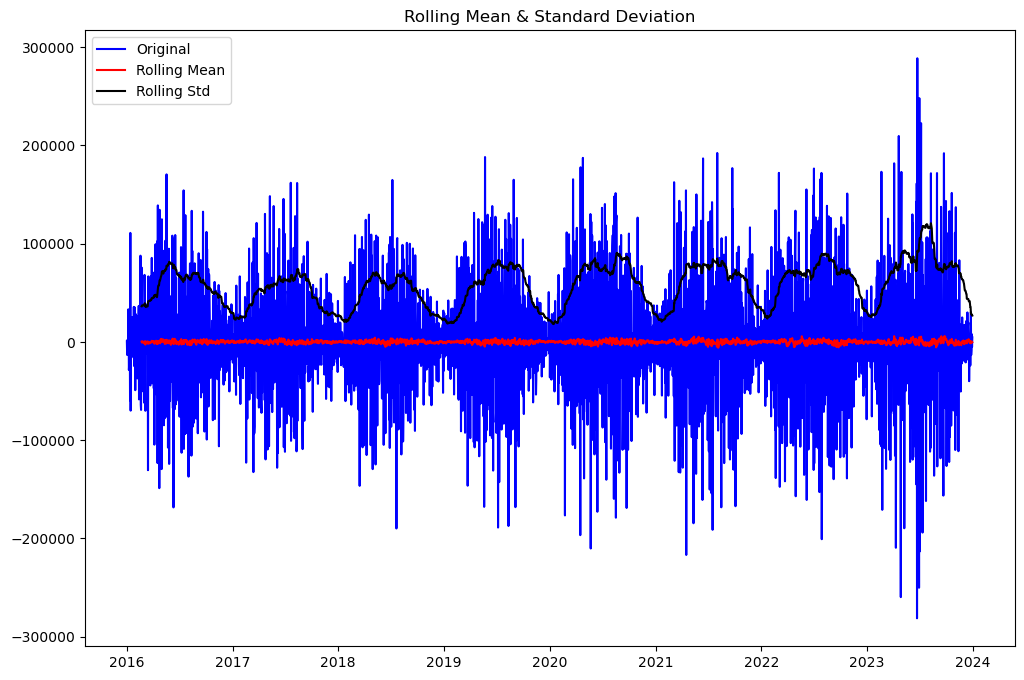

Results of Dickey-Fuller Test:
Test Statistic                -1.652604e+01
p-value                        2.043683e-29
#Lags Used                     2.800000e+01
Number of Observations Used    2.892000e+03
Critical Value (1%)           -3.432613e+00
Critical Value (5%)           -2.862540e+00
Critical Value (10%)          -2.567302e+00
dtype: float64


In [47]:
# Beispiel: Berechnung der ersten Differenz
df['first_difference'] = df['Act_in_MW'].diff()

# Beispiel: Berechnung der saisonalen Differenz
df['seasonal_first_difference'] = df['first_difference'] - df['first_difference'].shift(365)

# Test auf Stationarität
test_stationarity(df['seasonal_first_difference'].dropna(inplace=False))

# Method #3: ACF plot and PACF plot

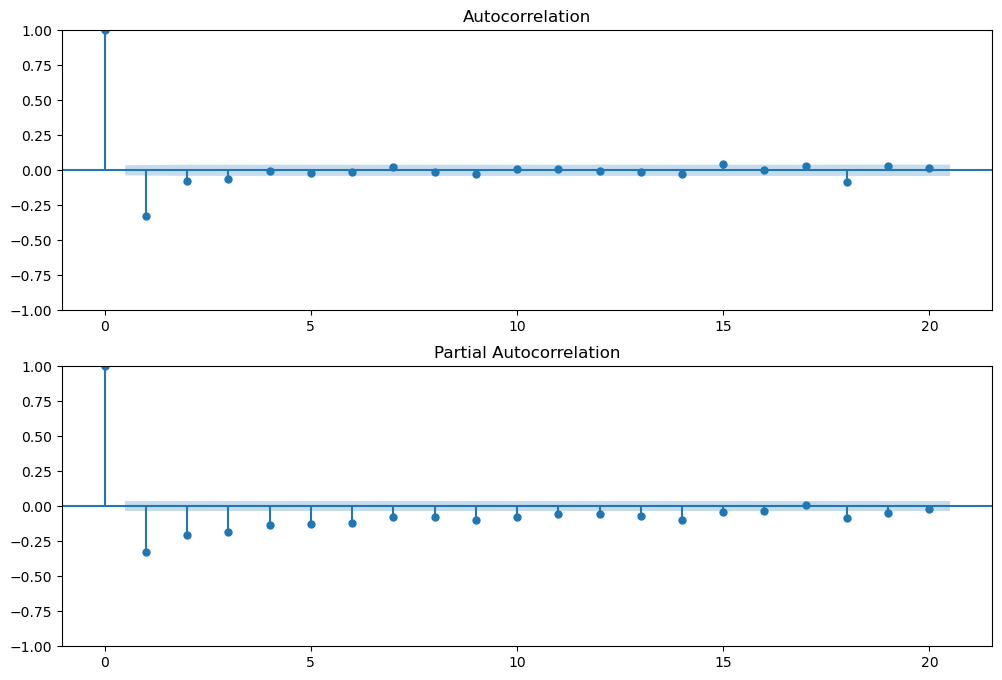

In [10]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.seasonal_first_difference.iloc[366:], lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference.iloc[366:], lags=20, ax=ax2)

### Downsample to weekly frequency by summing the daily values

In [164]:
#df
# Convert index to DatetimeIndex
df.index = pd.to_datetime(df.index)

# Downsample to weekly frequency by summing the daily values
df_weekly = df.resample('W').sum()
#df_weekly

#df = pd.read_csv('us_df_final_2015_2023.csv',index_col='Unnamed: 0',parse_dates=['date'])
#df.loc[:,'Month'] = df.loc[:,'date'].dt.month
#df.loc[:,'Year'] = df.loc[:,'date'].dt.year
#df.loc[:,'Calendar_Week'] = df.loc[:,'date'].dt.strftime('%U')
#und Year, Month, Calendar_Week mit oneHotEncoding aufdröseln

# Step 2: Determine ARIMA models parameters p,d, q and seasonal_pdq

### To determine the best parameter, cross-validation is applied

In [152]:
import itertools
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

# Parameterkombinationen für die Grid-Suche
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in pdq]  # Tägliche saisonale Komponente

best_aic = float("inf")
best_pdq = None
best_seasonal_pdq = None

# Initialisierung des Kreuzvalidierungssplitters
tscv = TimeSeriesSplit(n_splits=5)

# Durchführung der Kreuzvalidierung
for train_index, test_index in tscv.split(df_weekly):
    train_data = df_weekly.iloc[train_index]
    test_data = df_weekly.iloc[test_index]

    # Finden der besten Parameter mit den Trainingsdaten
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(train_data['Act_in_MW'], order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
                results = mod.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
            except:
                continue


# Ausgabe der besten Parameter und des niedrigsten AIC-Werts
print('Beste Parameter (pdq, seasonal_pdq):', best_pdq, best_seasonal_pdq)
print('Bestes AIC:', best_aic)

Beste Parameter (pdq, seasonal_pdq): (0, 0, 0) (0, 1, 1, 52)
Bestes AIC: 4.0


# Step 3: Fit the ARIMA model

#### Model is adjusted to the achieved parameter

In [116]:
# Modell mit den besten Parametern anpassen
mod = sm.tsa.statespace.SARIMAX(df_weekly['Act_in_MW'], order=(0,0,0), seasonal_order=(0,1,1,52), enforce_stationarity=True, enforce_invertibility=False)
results = mod.fit()

# Vorhersagen auf den Daten machen
pred = results.predict()

# Fehlermetriken berechnen
mae = np.mean(np.abs(pred - df_weekly['Act_in_MW']))
mse = np.mean((pred - df_weekly['Act_in_MW'])**2)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Absolute Error (MAE): 229983.78580318057
Mean Squared Error (MSE): 112703385042.95605
Root Mean Squared Error (RMSE): 335713.2482386658


In [118]:
# Vorhersagen des Modells
df_weekly['forecast'] = results.predict(start = '2015-01-04', end= '2023-12-31', dynamic= False)  

# Wahre Werte für das Jahr 2022
true_values = df_weekly['Act_in_MW']
# Berechnen des Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

# Berechnen des MAPE
mape = mean_absolute_percentage_error(true_values, predictions)
print('Mean Absolute Percentage Error (MAPE):', mape)

Mean Absolute Percentage Error (MAPE): 0.017442456724799466


In [105]:
print(results.summary())

                                 SARIMAX Results                                  
Dep. Variable:                  Act_in_MW   No. Observations:                  470
Model:             SARIMAX(0, 1, [1], 52)   Log Likelihood               -5782.391
Date:                    Wed, 13 Mar 2024   AIC                          11568.781
Time:                            21:20:10   BIC                          11576.852
Sample:                        01-04-2015   HQIC                         11571.972
                             - 12-31-2023                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L52      -0.2116      0.045     -4.711      0.000      -0.300      -0.124
sigma2      7.354e+10   6.88e-14   1.07e+24      0.000    7.35e+10    7.35e+10
Ljung-Box (L1) (Q): 

#### Compare the actual values with the forecast using a graph

Text(0.5, 1.0, 'Actual vs Forecast Values')

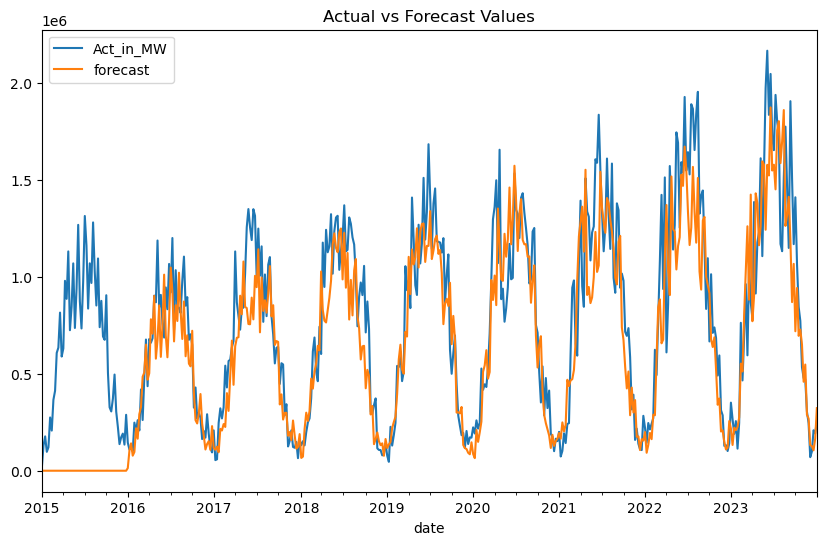

In [174]:
df_weekly['forecast'] = results.predict(start = '2015-01-04', end= '2023-12-31', dynamic= False)  
df_weekly[['Act_in_MW', 'forecast']].plot(figsize=(10, 6))
plt.title('Actual vs Forecast Values')
#df_weekly['forecast']

### Vorhersage und Konfidenzintervall berechnen

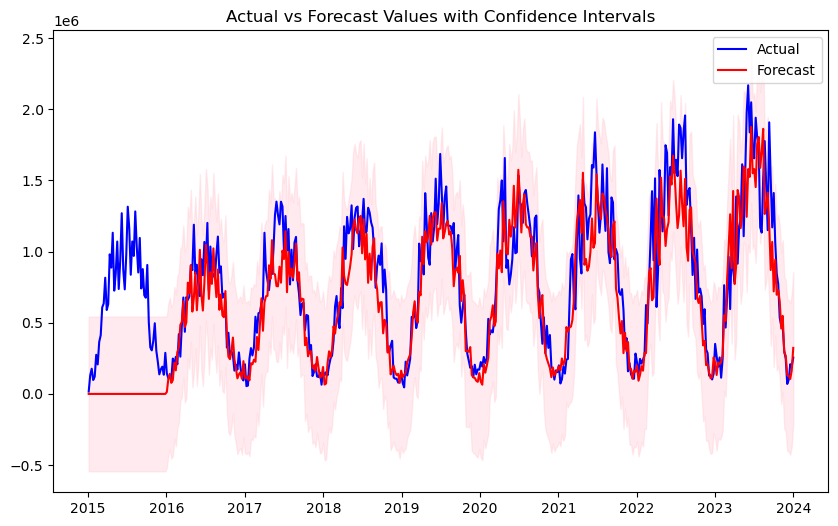

In [175]:
# Annahme: 'results' ist Ihr Modellobjekt

# Vorhersage und Konfidenzintervall berechnen
pred = results.get_prediction(start='2015-01-04', end='2023-12-31', dynamic=False)
pred_conf = pred.conf_int(alpha=0.05)

# Datenrahmen für die Vorhersage und Konfidenzintervall erstellen
df_pred = pred.predicted_mean
df_pred_conf = pd.DataFrame({'lower_bound': pred_conf.iloc[:, 0], 'upper_bound': pred_conf.iloc[:, 1]})

# Plot erstellen
plt.figure(figsize=(10, 6))
plt.plot(df_weekly.index, df_weekly['Act_in_MW'], label='Actual', color='blue')
plt.plot(df_weekly.index, df_weekly['forecast'], label='Forecast', color='red')
plt.fill_between(df_pred_conf.index, df_pred_conf['lower_bound'], df_pred_conf['upper_bound'], color='pink', alpha=0.3)
plt.title('Actual vs Forecast Values with Confidence Intervals')
plt.legend()
plt.show()

# Step 4: Make time series predictions

### Forecast future values (e.g., for next 52 steps)

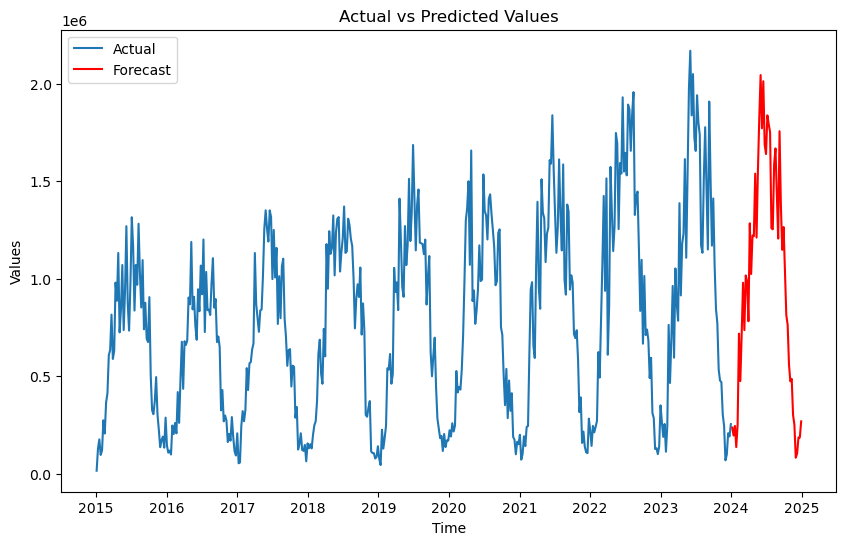

In [119]:
forecast_steps = 52
forecast = results.get_forecast(steps=forecast_steps)
# Extract forecasted values
forecast_values = forecast.predicted_mean

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(df_weekly.index, df_weekly.Act_in_MW, label='Actual')
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

# Step 5: Evaluate model predictions

### Calculate residuals

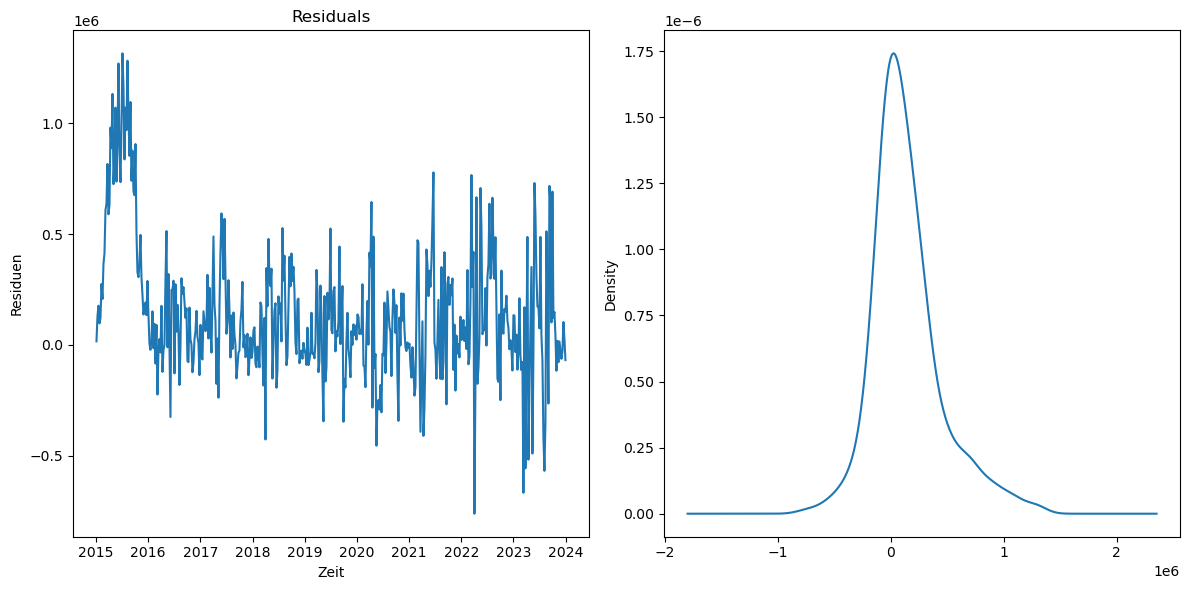

In [142]:
import seaborn as sns
import statsmodels.api as sm

# Berechnen Sie die Residuen
residuals = results.resid

# Plot der Residuen ab 2016
plt.figure(figsize=(12, 6))

# Plot der Residuen
plt.subplot(1, 2, 1)
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Zeit')
plt.ylabel('Residuen')

# Dichtediagramm
plt.subplot(1, 2, 2)
residuals.plot(kind='kde')

plt.tight_layout()
plt.show()


Residual Mean Absolute Error: 229983.78580318057
Residual Mean Squared Error: 112703385042.95605
Residual Root Mean Squared Error: 335713.2482386658


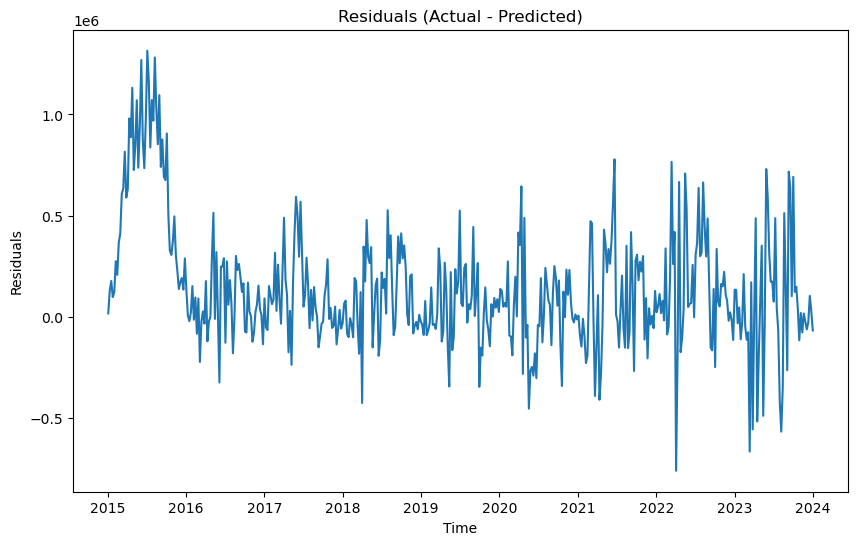

In [146]:
# Calculate residuals
residuals = df_weekly['Act_in_MW'] - df_weekly['forecast']

# Calculate error metrics for residuals
residual_mae = np.mean(np.abs(residuals))
residual_mse = np.mean(residuals**2)
residual_rmse = np.sqrt(residual_mse)

# Print error metrics for residuals
print("Residual Mean Absolute Error:", residual_mae)
print("Residual Mean Squared Error:", residual_mse)
print("Residual Root Mean Squared Error:", residual_rmse)

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals (Actual - Predicted)')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

In [87]:
from scipy import stats

# Shapiro-Wilk-Test auf Normalverteilung der Residuen
shapiro_test_stat, shapiro_p_value = stats.shapiro(residuals)
print('Shapiro-Wilk-Test Statistik:', shapiro_test_stat)
print('Shapiro-Wilk-Test p-Wert:', shapiro_p_value)

Shapiro-Wilk-Test Statistik: 0.9608070254325867
Shapiro-Wilk-Test p-Wert: 1.0030795749571553e-08


In [148]:
df_weekly.columns

Index(['03668_FD_STRAHL', '03668_FG_STRAHL', '03668_SD_STRAHL',
       '05792_FD_STRAHL', '05792_FG_STRAHL', '05792_SD_STRAHL',
       '05856_FD_STRAHL', '05856_FG_STRAHL', '05856_SD_STRAHL',
       '05705_FD_STRAHL', '05705_FG_STRAHL', '05705_SD_STRAHL',
       '02290_FD_STRAHL', '02290_FG_STRAHL', '02290_SD_STRAHL',
       '05404_FD_STRAHL', '05404_FG_STRAHL', '05404_SD_STRAHL',
       'Bruttoleistung', 'Nettoleistung', 'Prog_in_MW', 'Act_in_MW',
       'Bruttoleistung_kumulativ', 'Nettoleistung_kumulativ',
       'first_difference', 'seasonal_first_difference', 'forecast'],
      dtype='object')

#### The model has been fitted for one variable and now we want to extend it to all seasonal variables to compare the actual values with the forecasts.

In [170]:
import statsmodels.api as sm

# Annahme: df_weekly enthält die Variablen 'Act_in_MW', 'Brottoleistung' und 'Nettoleistung', sowie die Spalte 'Date'

# Liste der Variablennamen außer 'Date'
variable_names = ['03668_FD_STRAHL', '03668_FG_STRAHL', '03668_SD_STRAHL',
       '05792_FD_STRAHL', '05792_FG_STRAHL', '05792_SD_STRAHL',
       '05856_FD_STRAHL', '05856_FG_STRAHL', '05856_SD_STRAHL',
       '05705_FD_STRAHL', '05705_FG_STRAHL', '05705_SD_STRAHL',
       '02290_FD_STRAHL', '02290_FG_STRAHL', '02290_SD_STRAHL',
       '05404_FD_STRAHL', '05404_FG_STRAHL', '05404_SD_STRAHL',
       'Prog_in_MW', 'Act_in_MW']

# Dictionary zum Speichern der Modellergebnisse für jede Variable
results_dict = {}

# Loop über jede Variable und Schätzung des SARIMA-Modells
for var_name in variable_names:
    mod = sm.tsa.statespace.SARIMAX(df_weekly[var_name], order=(0,0,0), seasonal_order=(0,1,1,52),
                                    enforce_stationarity=True, enforce_invertibility=False)
    results = mod.fit()
    results_dict[var_name] = results

# Ergebnisse für jede Variable anzeigen
for var_name, results in results_dict.items():
    print(f"Results for {var_name}:")
    print("Log Likelihood:", results.llf)
    print("AIC:", results.aic)
    print("BIC:", results.bic)
    print("\n")


Results for 03668_FD_STRAHL:
Log Likelihood: -3380.5383694540023
AIC: 6765.076738908005
BIC: 6773.147701773054


Results for 03668_FG_STRAHL:
Log Likelihood: -3865.131374493757
AIC: 7734.262748987514
BIC: 7742.333711852563


Results for 03668_SD_STRAHL:
Log Likelihood: -1807.4239963664852
AIC: 3618.8479927329704
BIC: 3626.9189555980197


Results for 05792_FD_STRAHL:
Log Likelihood: -3555.973183175398
AIC: 7115.946366350796
BIC: 7124.017329215845


Results for 05792_FG_STRAHL:
Log Likelihood: -3841.599371654319
AIC: 7687.198743308638
BIC: 7695.269706173687


Results for 05792_SD_STRAHL:
Log Likelihood: -1806.4933133522436
AIC: 3616.986626704487
BIC: 3625.0575895695365


Results for 05856_FD_STRAHL:
Log Likelihood: -3394.6459119964643
AIC: 6793.291823992929
BIC: 6801.362786857978


Results for 05856_FG_STRAHL:
Log Likelihood: -3868.4144372191186
AIC: 7740.828874438237
BIC: 7748.899837303286


Results for 05856_SD_STRAHL:
Log Likelihood: -1799.1337498558619
AIC: 3602.2674997117238
BIC: 36

# Compare actual values with forecasts

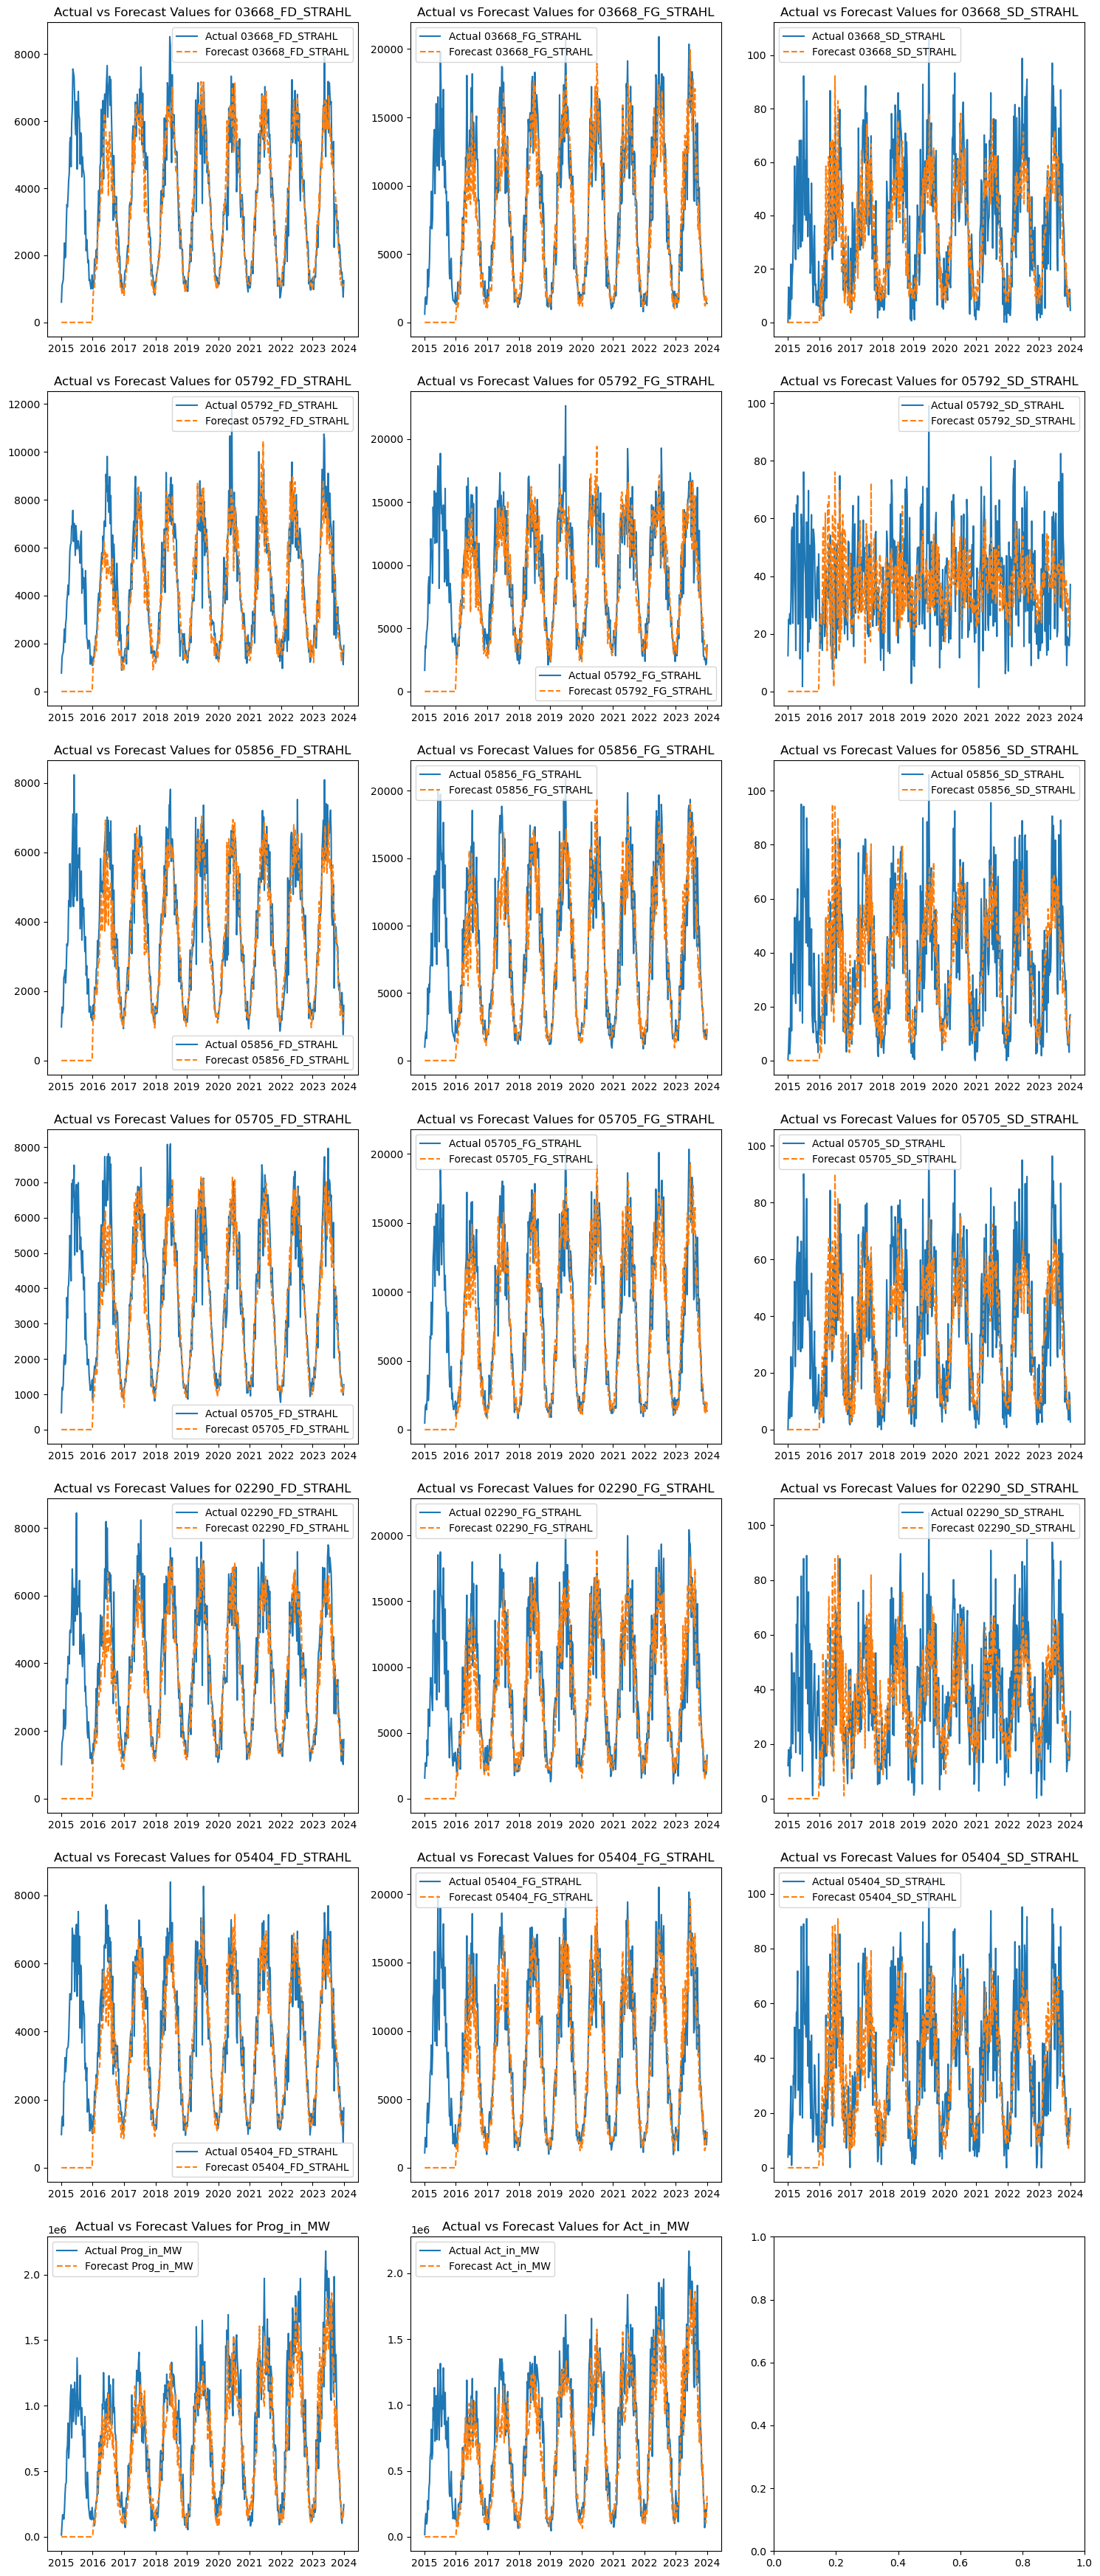

In [176]:
import matplotlib.pyplot as plt

# Dictionary zum Speichern der Modellergebnisse für jede Variable
results_dict = {}

# Loop über jede Variable und Schätzung des SARIMA-Modells
for var_name in variable_names:
    mod = sm.tsa.statespace.SARIMAX(df_weekly[var_name], order=(0,0,0), seasonal_order=(0,1,1,52),
                                    enforce_stationarity=True, enforce_invertibility=False)
    results = mod.fit()  # Ergebnisse für die aktuelle Variable erhalten
    results_dict[var_name] = results  # Ergebnisse für die aktuelle Variable im Dictionary speichern

# Erstellen der Subplots für die Plots
num_plots = len(results_dict)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Prognosen für jede Variable berechnen und plotten
for i, (var_name, results) in enumerate(results_dict.items()):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    df_weekly[var_name + '_forecast'] = results.predict(start='2015-01-04', end='2023-12-31', dynamic=False)
    
    ax.plot(df_weekly.index, df_weekly[var_name], label='Actual ' + var_name)
    ax.plot(df_weekly.index, df_weekly[var_name + '_forecast'], linestyle='--', label='Forecast ' + var_name)
    ax.set_title('Actual vs Forecast Values for ' + var_name)
    ax.legend()

# Aufteilen der Subplots und Anzeigen
plt.tight_layout()
plt.show()

# Predictions

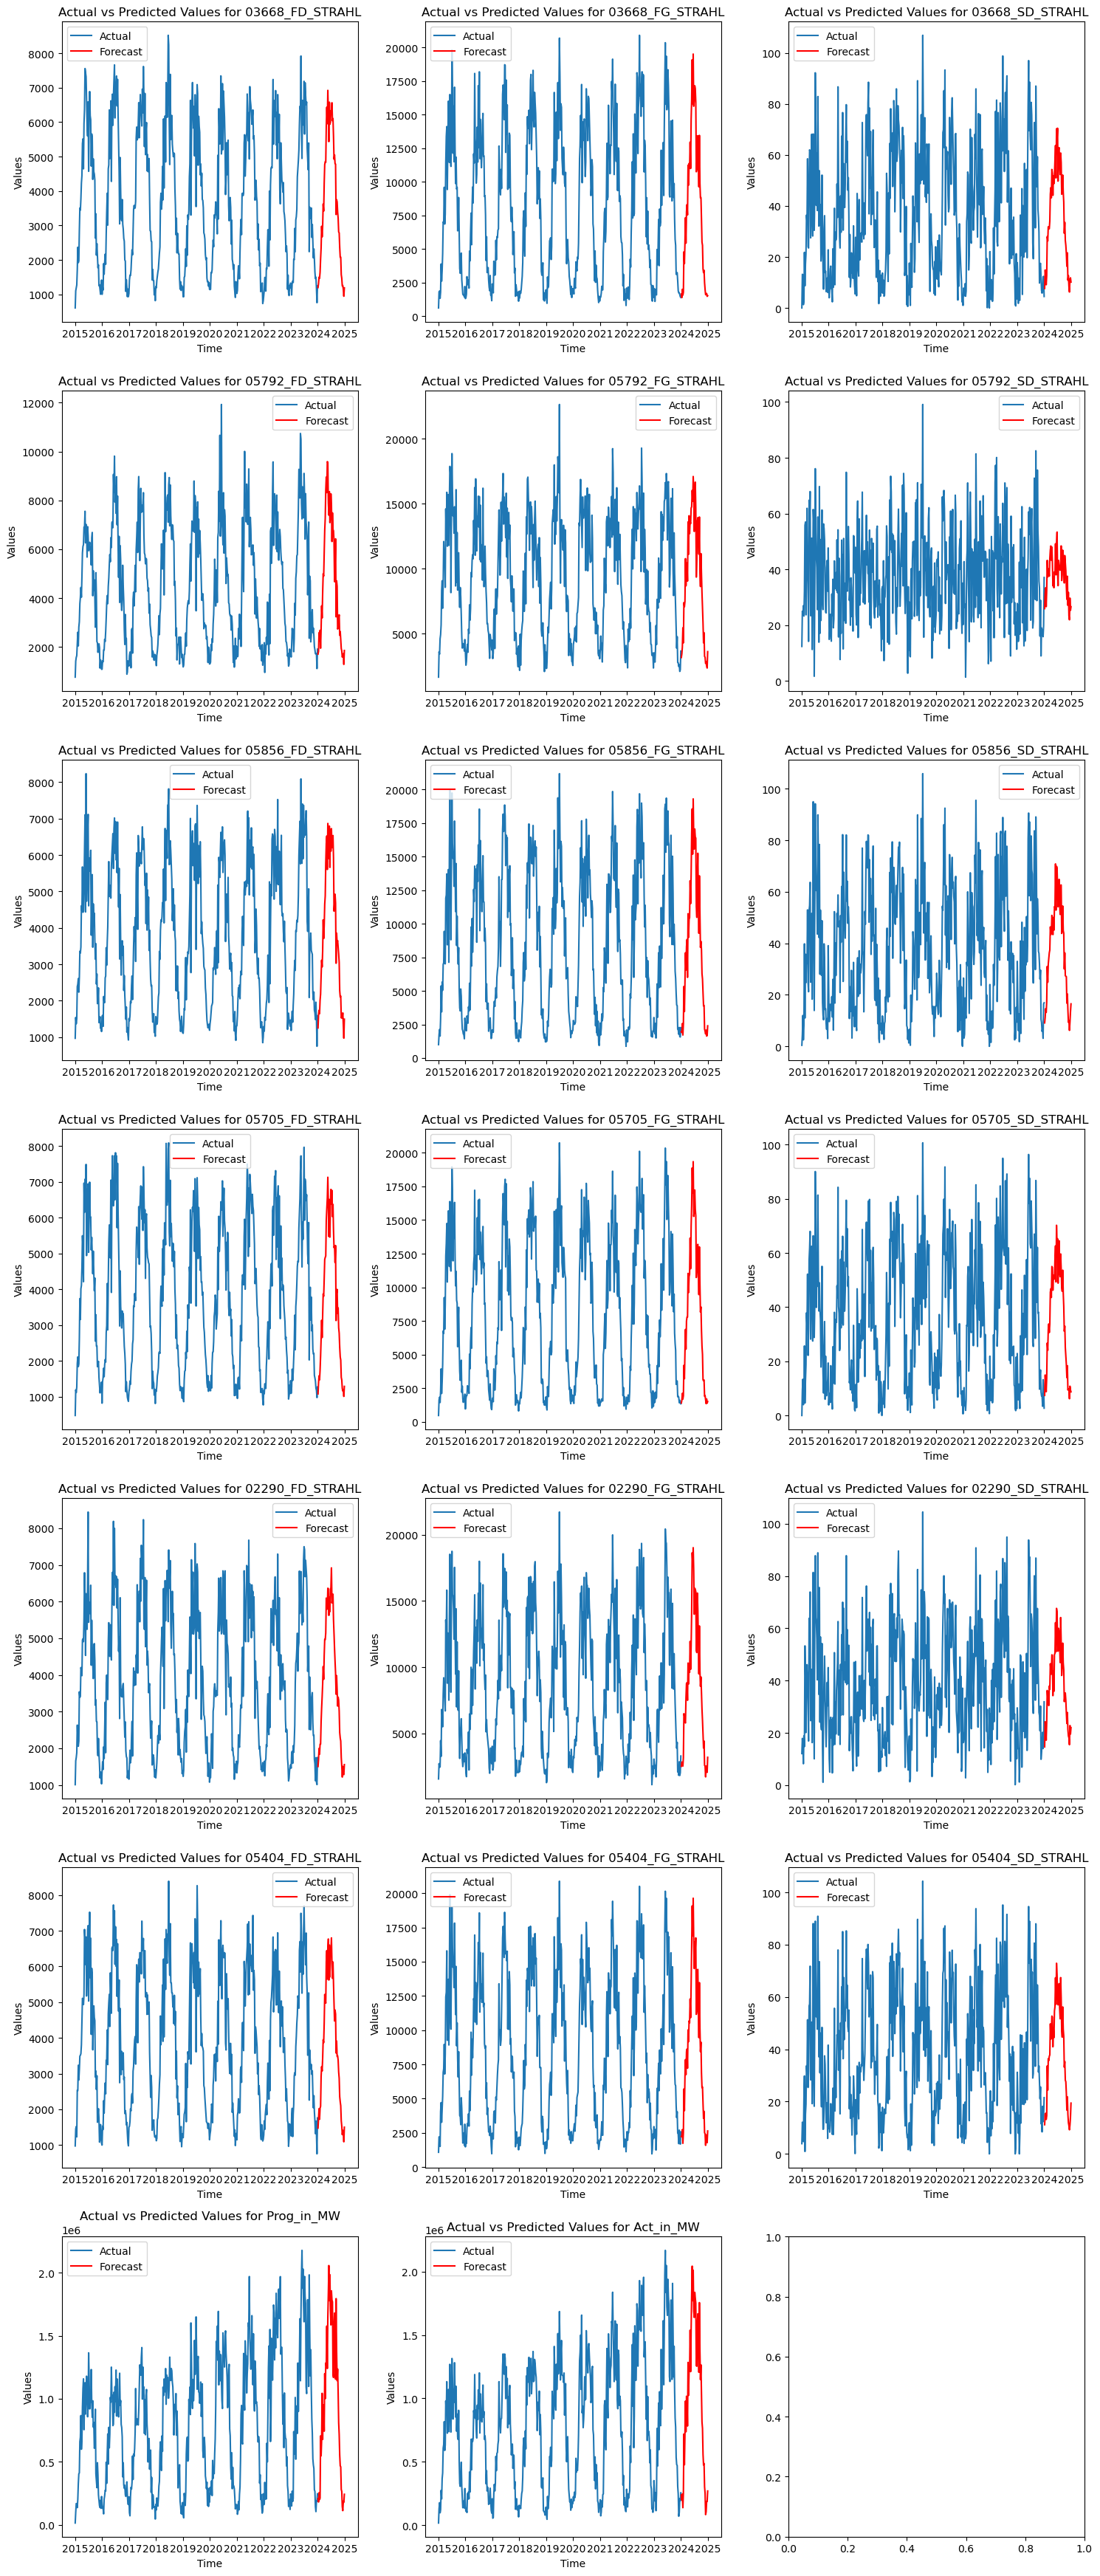

In [177]:
forecast_steps = 52

# Anzahl der Variablen im DataFrame
num_vars = len(results_dict)

# Anzahl der Subplots pro Zeile
num_subplots_per_row = 3

# Anzahl der Zeilen benötigt
num_rows = (num_vars + num_subplots_per_row - 1) // num_subplots_per_row

# Erstellen der Subplots
fig, axes = plt.subplots(num_rows, num_subplots_per_row, figsize=(15, 5*num_rows))

# Loop über jede Variable und Erstellung der Plots
for i, (var_name, results) in enumerate(results_dict.items()):
    row = i // num_subplots_per_row
    col = i % num_subplots_per_row
    ax = axes[row, col]
    
    # Prognosen für die aktuelle Variable erhalten
    forecast = results.get_forecast(steps=forecast_steps)
    forecast_values = forecast.predicted_mean
    
    # Plot erstellen
    ax.plot(df_weekly.index, df_weekly[var_name], label='Actual')
    ax.plot(forecast_values.index, forecast_values, label='Forecast', color='red')
    ax.set_title(f'Actual vs Predicted Values for {var_name}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Values')
    ax.legend()

# Aufteilen der Subplots und Anzeigen
plt.tight_layout()
plt.show()